In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.read_csv('Iris.csv')
print(df.shape, '\n', df.columns)

(150, 6) 
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [22]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [24]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']
df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]

Species
Iris-setosa        [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Iris-versicolor    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Iris-virginica     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

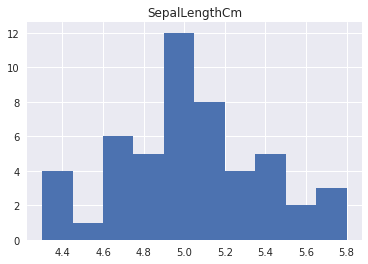

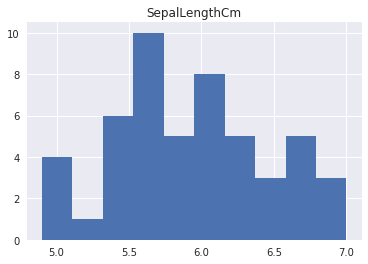

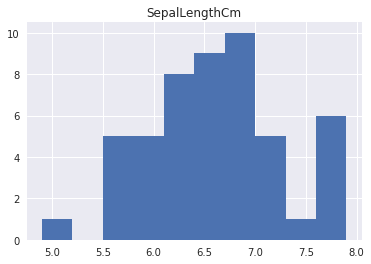

In [25]:
dfG = df[['SepalLengthCm', 'Species']].groupby('Species')
dfG.hist()

# Modeling

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set



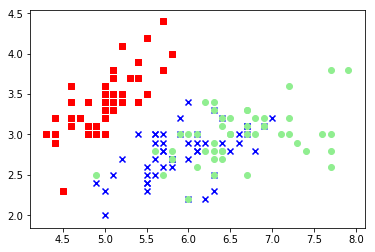

In [69]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X.loc[y == cl, "SepalLengthCm"], y=X.loc[y == cl, 'SepalWidthCm'],
               c=cmap(idx), marker=markers[idx], label=cl)

In [29]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
clf.fit(X_train, y_train)

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(clf.score(X_test, y_test)))

The accuracy of the svm classifier on test data is 0.98 out of 1
